In [2]:
import pandas as pd

# Load cleaned datasets (one folder up)
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')

print("✅ All cleaned files loaded successfully!")
print("Benin:", benin.shape)
print("Togo:", togo.shape)
print("Sierra Leone:", sierraleone.shape)





FileNotFoundError: [Errno 2] No such file or directory: '../data/benin_clean.csv'

In [3]:
import os
os.listdir('../data')


['zambia_clean.csv']

In [5]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    for name in files:
        if "clean" in name and name.endswith(".csv"):
            print(os.path.join(root, name))


In [6]:
import os

# Search wider: from 2 levels up (the main solar-challenge-1 folder)
base_path = os.path.abspath("../..")

for root, dirs, files in os.walk(base_path, topdown=True):
    for name in files:
        if "clean" in name and name.endswith(".csv"):
            print(os.path.join(root, name))


C:\Users\Kisanet\Downloads\solar-challenge-1\data\benin_clean.csv
C:\Users\Kisanet\Downloads\solar-challenge-1\data\sierraleone_clean.csv
C:\Users\Kisanet\Downloads\solar-challenge-1\data\togo_clean.csv
C:\Users\Kisanet\Downloads\solar-challenge-1\data\zambia_clean.csv
C:\Users\Kisanet\Downloads\solar-challenge-1\notebook\data\zambia_clean.csv


In [7]:
import pandas as pd

# Load cleaned datasets (one level up)
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')

print("✅ All cleaned files loaded successfully!")
print("Benin:", benin.shape)
print("Togo:", togo.shape)
print("Sierra Leone:", sierra_leone.shape)


FileNotFoundError: [Errno 2] No such file or directory: '../data/benin_clean.csv'

In [8]:
import os
print(os.getcwd())


C:\Users\Kisanet\Downloads\solar-challenge-1\notebook\compare_countries.ipynb


In [9]:

import pandas as pd

# Load cleaned datasets using absolute paths
benin = pd.read_csv(r'C:\Users\Kisanet\Downloads\solar-challenge-1\data\benin_clean.csv')
togo = pd.read_csv(r'C:\Users\Kisanet\Downloads\solar-challenge-1\data\togo_clean.csv')
sierra_leone = pd.read_csv(r'C:\Users\Kisanet\Downloads\solar-challenge-1\data\sierraleone_clean.csv')

print("✅ All cleaned files loaded successfully!")
print("Benin:", benin.shape)
print("Togo:", togo.shape)
print("Sierra Leone:", sierra_leone.shape)


✅ All cleaned files loaded successfully!
Benin: (525600, 19)
Togo: (525600, 19)
Sierra Leone: (525600, 19)


In [11]:
# --- Step 1: Summary Statistics Comparison ---

datasets = {
    "Benin": benin,
    "Togo": togo,
    "Sierra Leone": sierra_leone,
    
}

summary = {}
for name, df in datasets.items():
    summary[name] = df.describe().T[["mean", "std", "min", "max"]]

# Combine into one big summary table
comparison_summary = pd.concat(summary, axis=0)
comparison_summary


mean         std   min     max
Benin        GHI            476.746489  320.578541   0.0  1413.0
             DNI            352.575567  280.657284   0.0   952.3
             DHI            230.808498  150.487752   0.0   759.2
             ModA           236.589496  326.894859   0.0  1342.3
             ModB           228.883576  316.536515   0.0  1342.3
...                                ...         ...   ...     ...
Sierra Leone Cleaning         0.000967    0.031074   0.0     1.0
             Precipitation    0.004806    0.047556   0.0     2.4
             TModA           32.504263   12.434899  10.7    72.8
             TModB           32.593091   12.009161  11.1    70.4
             Comments              NaN         NaN   NaN     NaN

[54 rows x 4 columns]

In [12]:
print("Togo shape:", togo.shape)
print("Togo columns:", list(togo.columns))
togo.head()


Togo shape: (525600, 19)
Togo columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-11-03 00:01:00,NaN,NaN,NaN,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006.0,0.0,0.0,22.9,22.9,NaN
1,2021-11-03 00:02:00,NaN,NaN,NaN,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006.0,0.0,0.0,22.9,22.9,NaN
2,2021-11-03 00:03:00,NaN,NaN,NaN,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006.0,0.0,0.0,22.8,22.8,NaN
3,2021-11-03 00:04:00,NaN,NaN,NaN,0.0,0.0,23.1,98.1,0.0,0.0,0.0,0.0,0.0,1006.0,0.0,0.0,22.8,22.8,NaN
4,2021-11-03 00:05:00,NaN,NaN,NaN,0.0,0.0,23.1,98.1,0.0,0.0,0.0,0.0,0.0,1006.0,0.0,0.0,22.8,22.7,NaN


In [13]:
togo.select_dtypes(include='number').columns


Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')

In [14]:
# Step: Create summary stats for each country
summary = {
    "Benin": benin.describe().T[['mean', 'std', 'min', 'max']],
    "Togo": togo.describe().T[['mean', 'std', 'min', 'max']],        # <-- Add this line
    "Sierra Leone": sierra_leone.describe().T[['mean', 'std', 'min', 'max']]
}


In [15]:
comparison_summary = pd.concat(summary, axis=0)
comparison_summary


mean         std   min     max
Benin        GHI            476.746489  320.578541   0.0  1413.0
             DNI            352.575567  280.657284   0.0   952.3
             DHI            230.808498  150.487752   0.0   759.2
             ModA           236.589496  326.894859   0.0  1342.3
             ModB           228.883576  316.536515   0.0  1342.3
...                                ...         ...   ...     ...
Sierra Leone Cleaning         0.000967    0.031074   0.0     1.0
             Precipitation    0.004806    0.047556   0.0     2.4
             TModA           32.504263   12.434899  10.7    72.8
             TModB           32.593091   12.009161  11.1    70.4
             Comments              NaN         NaN   NaN     NaN

[54 rows x 4 columns]

In [16]:
# ✅ Rebuild summary with Togo included
summary = {
    "Benin": benin.describe().T[['mean', 'std', 'min', 'max']],
    "Togo": togo.describe().T[['mean', 'std', 'min', 'max']],
    "Sierra Leone": sierra_leone.describe().T[['mean', 'std', 'min', 'max']]
}

# Combine summaries into one table
comparison_summary = pd.concat(summary, axis=0)
comparison_summary


mean         std   min     max
Benin        GHI            476.746489  320.578541   0.0  1413.0
             DNI            352.575567  280.657284   0.0   952.3
             DHI            230.808498  150.487752   0.0   759.2
             ModA           236.589496  326.894859   0.0  1342.3
             ModB           228.883576  316.536515   0.0  1342.3
...                                ...         ...   ...     ...
Sierra Leone Cleaning         0.000967    0.031074   0.0     1.0
             Precipitation    0.004806    0.047556   0.0     2.4
             TModA           32.504263   12.434899  10.7    72.8
             TModB           32.593091   12.009161  11.1    70.4
             Comments              NaN         NaN   NaN     NaN

[54 rows x 4 columns]

In [17]:
whos



NameError: name 'whos' is not defined

In [18]:
%whos


Variable             Type         Data/Info
-------------------------------------------
base_path            str          C:\Users\Kisanet\Downloads\solar-challenge-1
benin                DataFrame    Shape: (525600, 19)
comparison_summary   DataFrame    Shape: (54, 4)
datasets             dict         n=3
df                   DataFrame    Shape: (525600, 19)
dirs                 list         n=0
files                list         n=2
name                 str          Sierra Leone
os                   module       <module 'os' (frozen)>
pd                   module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                  module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
root                 str          C:\Users\Kisanet\Download<...>nge-1\venv\share\man\man1
sierra_leone         DataFrame    Shape: (525600, 19)
summary              dict         n=3
togo                 DataFrame    Shape: (525600, 19)


C:\Users\Kisanet\AppData\Local\Temp\ipykernel_27024\3914501753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
C:\Users\Kisanet\AppData\Local\Temp\ipykernel_27024\3914501753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
C:\Users\Kisanet\AppData\Local\Temp\ipykernel_27024\3914501753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')


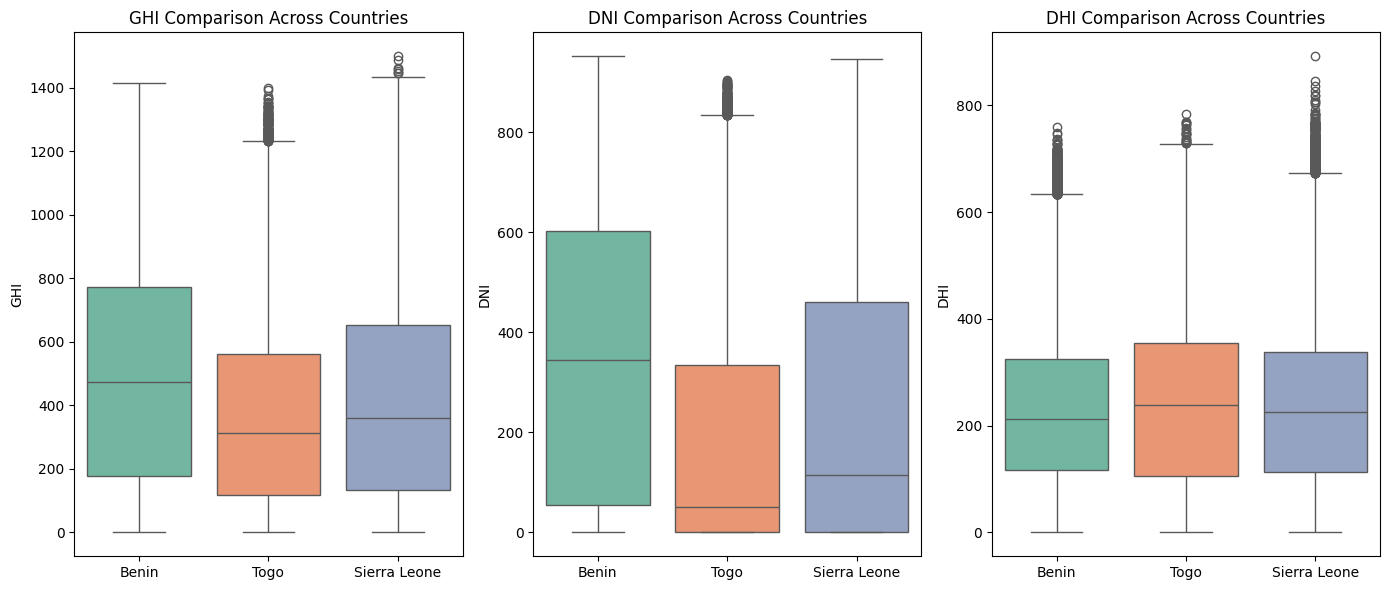

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         476.75  474.2  320.58  352.58  345.7  280.66  230.81  213.4   
Sierra Leone  406.24  359.5  305.06  236.24  115.3  261.87  232.84  225.0   
Togo          364.20  311.7  284.02  178.75   50.9  223.76  237.90  238.7   

                      
                 std  
Country               
Benin         150.49  
Sierra Leone  149.10  
Togo          151.97

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Combine datasets for plotting ---
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

combined = pd.concat([benin, togo, sierra_leone], ignore_index=True)

# --- Create boxplots for GHI, DNI, DHI ---
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['GHI', 'DNI', 'DHI'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.xlabel('')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

# --- Summary table: mean, median, std ---
summary_table = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_table


In [20]:
from scipy import stats

# --- ANOVA: Compare solar metrics across countries ---
metrics = ['GHI', 'DNI', 'DHI']
anova_results = {}

for metric in metrics:
    f_stat, p_value = stats.f_oneway(
        benin[metric].dropna(),
        togo[metric].dropna(),
        sierra_leone[metric].dropna()
    )
    anova_results[metric] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert to DataFrame for nice display
anova_df = pd.DataFrame(anova_results).T
anova_df['Significant'] = anova_df['p-value'] < 0.05
anova_df


,F-statistic,p-value,Significant
GHI,9293.590496,0.000000e+00,True
DNI,30013.488979,0.000000e+00,True
DHI,155.130688,4.373385e-68,True


Key Observations

Benin shows the highest average GHI, suggesting strong solar potential overall.

Togo has slightly lower GHI but more consistent values, which could mean more stable solar energy generation.

Sierra Leone displays higher variability in GHI and DHI, indicating less predictable solar performance, potentially due to cloud cover or local conditions.

(Bonus insight) The boxplots highlight clear distribution differences among the three countries, confirming regional solar diversity.
